# Pytorch and Tensorflow 102 Polynomial Regression

The polynomial regression is the next step, the main difference apart from linear regression is the number of weights.

First, let's consider customize ML without using pytorch or TensorFlow

# Customize Machine Learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'y = 1000 -2x - 4x^2')

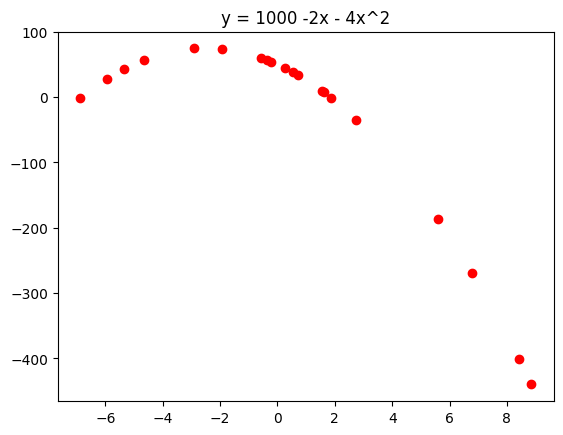

In [5]:
# we define 
X = np.random.uniform(low=-10, high=10, size=(20,)).astype(np.float32)
Y = 50-(20*X) - (4*(X**2))
X_test = np.random.uniform(low=-10, high=10, size=(20,)).astype(np.float32)
plt.plot(X,Y,'ro')
plt.title("y = 1000 -2x - 4x^2")

### We define loss function by predicted (forward)

In [6]:
def forward(x,w0,w1,w2): 
    return w0 + (w1*x) + (w2*(x)**2)
def loss(y,y_predicted):
    return np.mean((y_predicted-y)**2)
class gredient_loss():
    def __init__(self,x,y,y_predicted):
        self.x = x 
        self.y = y
        self.y_predicted = y_predicted

    def order0(self):
        return 2*np.mean((self.y_predicted-self.y))
                      
    def order1(self):
        return np.mean(2 * (self.y_predicted - self.y) * self.x)
    
    def order2(self):
        return np.mean(2 * (self.y_predicted - self.y) * (self.x**2))


In [7]:

epochs = 10000
initial_lr = 0.0001
w0,w1,w2 = np.random.rand(3)

loss_custom = []
w_custom = []
for epoch in range(epochs):
    learning_rate = initial_lr 
    y_predict = forward(X,w0,w1,w2)
    l         = loss(Y,y_predict)
    loss_custom.append(l)
    
    gredient  = gredient_loss(X,Y,y_predict)
    dw0,dw1,dw2  = gredient.order0(),gredient.order1(),gredient.order2()
    w0   -= learning_rate*dw0
    w1   -= learning_rate*dw1
    w2   -= learning_rate*dw2
    w_custom.append([w1,w2,w0])

    if epoch % 500 == 0:
        print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')

epoch:1: w0 = 0.071,w1 = 0.522,w2 = -0.759, loss = 25616.37890625
epoch:501: w0 = 3.399,w1 = -17.384,w2 = -3.193, loss = 1555.51110840
epoch:1001: w0 = 6.167,w1 = -20.600,w2 = -3.080, loss = 1144.15820312
epoch:1501: w0 = 8.698,w1 = -21.133,w2 = -3.103, loss = 1008.60168457
epoch:2001: w0 = 11.069,w1 = -21.173,w2 = -3.149, loss = 896.01696777
epoch:2501: w0 = 13.301,w1 = -21.125,w2 = -3.197, loss = 796.23815918
epoch:3001: w0 = 15.404,w1 = -21.064,w2 = -3.243, loss = 707.57897949
epoch:3501: w0 = 17.387,w1 = -21.004,w2 = -3.286, loss = 628.79180908
epoch:4001: w0 = 19.256,w1 = -20.947,w2 = -3.327, loss = 558.77752686
epoch:4501: w0 = 21.018,w1 = -20.892,w2 = -3.366, loss = 496.55914307
epoch:5001: w0 = 22.680,w1 = -20.841,w2 = -3.402, loss = 441.26861572
epoch:5501: w0 = 24.245,w1 = -20.793,w2 = -3.436, loss = 392.13439941
epoch:6001: w0 = 25.722,w1 = -20.748,w2 = -3.468, loss = 348.47125244
epoch:6501: w0 = 27.113,w1 = -20.705,w2 = -3.499, loss = 309.66995239
epoch:7001: w0 = 28.425,w

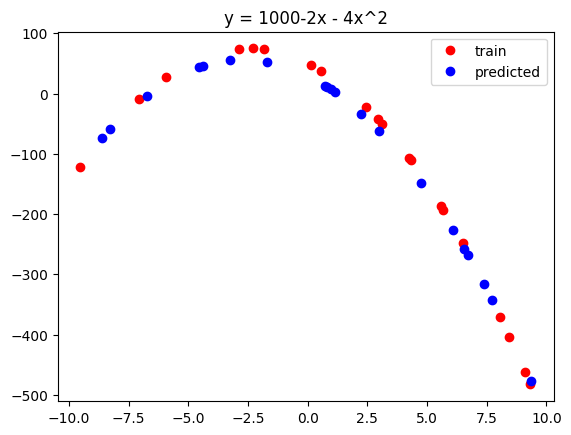

In [525]:
plt.plot(X,Y,'ro', label='train')
plt.plot(X_test,forward(X_test,w0,w1,w2),'bo', label='predicted')
plt.title("y = 1000-2x - 4x^2")
plt.legend()

In [439]:
# epochs = 10000
# initial_lr = 0.0001
# w0,w1,w2 = np.random.rand(3)
# batch_size = 4  # Mini-batch size

# for epoch in range(epochs):
#     for i in range(0, len(X), batch_size):
#         X_batch = X[i:i+batch_size]
#         Y_batch = Y[i:i+batch_size]

#         y_predict = forward(X_batch, w0, w1, w2)
#         l = loss(Y_batch, y_predict)
#         gredient = gredient_loss(X_batch, Y_batch, y_predict)
#         dw0, dw1, dw2 = gredient.order0(), gredient.order1(), gredient.order2()

#         w0 -= learning_rate * dw0
#         w1 -= learning_rate * dw1
#         w2 -= learning_rate * dw2

#     if epoch % 1000 == 0:
#         print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')


# Polynomial Regression with Pytorch

Similar to Linear regression, we need a class of model: here we define x_poly as follows
and notice that the bias terms are automatically included in nn.Module.Linear model so that we need just [x, x**2]

In [533]:
import torch
import torch.nn as nn 

class Polynomial_Regression(nn.Module): 
    def __init__(self):
        super(Polynomial_Regression, self).__init__()  
        self.poly = nn.Linear(2, 1)  # Bias (intercept) is automatically included in nn.Linear

    def forward(self, x):
        # Create polynomial features: x, x^2, and x^3
        x_poly = torch.cat([x, x**2], 1)
        return self.poly(x_poly)

def pytorch_columnize(z):
    return torch.from_numpy(z.reshape(len(z),1))

In [534]:
X = pytorch_columnize(X)
Y = pytorch_columnize(Y)
X_test = pytorch_columnize(X_test)

In [535]:
model = Polynomial_Regression()
n_iters = 200
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

loss_pytorch = []
w_pytorch = []
for epoch in range(n_iters):
    learning_rate = 1 
    y_pred = model(X)
    l = loss(Y,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_pytorch.append(l.detach().numpy())
    [w,b] = model.parameters()
    w_pytorch.append([w[0][0].item(),w[0][1].item(),b[0].item()])
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1}: w1 = {w[0][0].item():.3f},w2 = {w[0][1].item():.3f},b = {b[0].item():.3f}, loss = {l:.8f}')
print(f'predict before training: f(5) = {model(X_test).detach()}')




epoch:1: w1 = -0.306,w2 = -0.483,b = -0.739, loss = 50782.58984375
epoch:11: w1 = -10.023,w2 = -4.349,b = -3.102, loss = 10681.42480469
epoch:21: w1 = -17.830,w2 = -2.419,b = 1.563, loss = 3421.77807617
epoch:31: w1 = -21.722,w2 = -3.834,b = 3.992, loss = 1822.43981934
epoch:41: w1 = -21.819,w2 = -3.051,b = 8.928, loss = 1223.64062500
epoch:51: w1 = -20.250,w2 = -3.625,b = 12.847, loss = 721.99768066
epoch:61: w1 = -19.204,w2 = -3.393,b = 17.359, loss = 511.02398682
epoch:71: w1 = -19.227,w2 = -3.601,b = 21.246, loss = 379.84652710
epoch:81: w1 = -19.692,w2 = -3.614,b = 25.033, loss = 273.32461548
epoch:91: w1 = -19.934,w2 = -3.657,b = 28.527, loss = 202.41502380
epoch:101: w1 = -19.889,w2 = -3.735,b = 31.698, loss = 147.13195801
epoch:111: w1 = -19.813,w2 = -3.757,b = 34.593, loss = 104.47407532
epoch:121: w1 = -19.834,w2 = -3.802,b = 37.135, loss = 72.85099030
epoch:131: w1 = -19.894,w2 = -3.840,b = 39.359, loss = 49.85470200
epoch:141: w1 = -19.925,w2 = -3.865,b = 41.293, loss = 33.

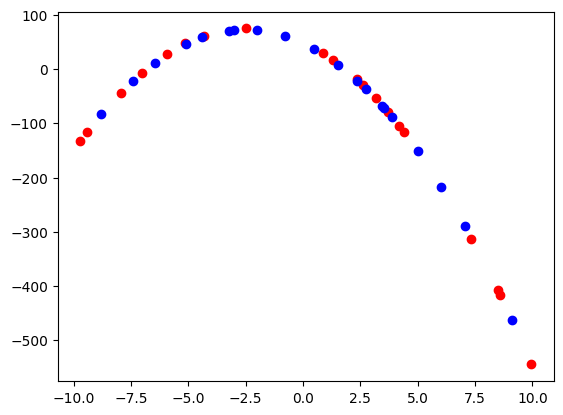

In [536]:
plt.plot(X,Y,'ro')
plt.plot(X_test,model(X_test).detach(),'bo')

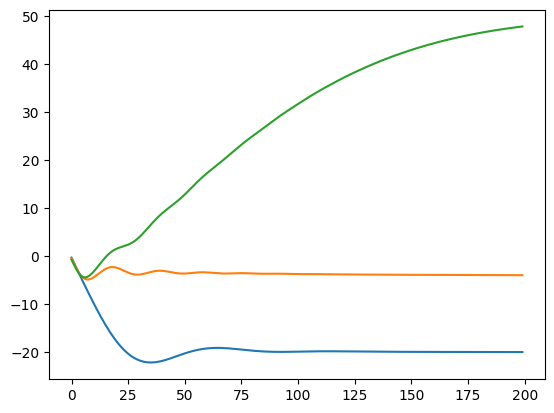

In [537]:
plt.plot(np.array(w_pytorch)[:,0])
plt.plot(np.array(w_pytorch)[:,1])
plt.plot(np.array(w_pytorch)[:,2])

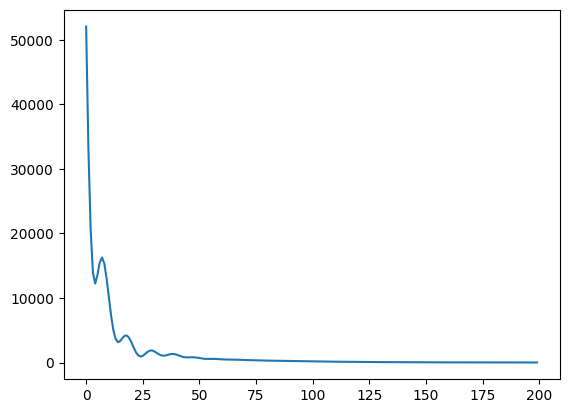

In [518]:
plt.plot(loss_pytorch)

# TensorFlow with Polynomial Regression

In [8]:
import numpy as np
import tensorflow as tf


def tf_tensor_columnize(z):
    return tf.convert_to_tensor(z.reshape(len(z), 1))

X = tf_tensor_columnize(X)
Y = tf_tensor_columnize(Y)
X_poly = tf_tensor_columnize(np.vstack((X, X**2))).T # Shape (100, 3), where the columns are [x, x^2, x^3]

# # Define the polynomial regression model
def model():
    model = tf.keras.models.Sequential()
    # Input shape should match the number of polynomial features (3 in this case)
    model.add(tf.keras.layers.Dense(units=1, input_shape=(2,)))
    return model

polynomial_model = model()

# Compile the model
polynomial_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
    loss='MeanSquaredError'
)

# # Custom callback to store weights and biases for plotting
# class WeightTracker(tf.keras.callbacks.Callback):
#     def __init__(self):
#         super(WeightTracker, self).__init__()
#         self.weights_history = []  # To store weights at each epoch
#         self.bias_history = []     # To store biases at each epoch

#     def on_epoch_end(self, epoch, logs=None):
#         # Get weights and biases from the model (weights[0]: 3 weights, weights[1]: bias)
#         weights = self.model.get_weights()
#         w = weights[0][:, 0]  # Get weights for x, x^2, x^3
#         b = weights[1][0]     # Get the bias term
#         # Append weights and biases to lists
#         self.weights_history.append(w)
#         self.bias_history.append(b)
#         if epoch % 10 == 0:
#             print(f'Epoch {epoch + 1}: weights = {w}, bias = {b:.3f}')

# # Initialize the weight tracker callback
# weight_tracker = WeightTracker()

# Train the model
history = polynomial_model.fit(
    X_poly,  # Polynomial input
    Y,       # Target output
    epochs=200,
    verbose=0,
    validation_split=0,
)
# # Access the weights and loss history
# w_tf = weight_tracker.weights_history
# bias_tf = weight_tracker.bias_history
# loss_tf = history.history['loss']

# # Print final learned weights and bias
# print(f'Final weights: {w_tf[-1]}')
# print(f'Final bias: {bias_tf[-1]}')


AttributeError: EagerTensor object has no attribute 'T'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      